## PROJECT: Analize a dataset; Red wine quality and White wine quality

### Table of Contents
#### 1. Assessing Data
#### 2. Appending Data
#### 3. Exploratory with visuals
#### 4. Drawing conclusion using query
#### 5. Conclusions

## Introduction:
This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
This data set contains samples of red wine and white wine data with several factors like acidity, citric acid content, sugar quantity etc as input and a physicochemical test done on these sensory data to determine the quality of the alchohol content on it on a scale between 0(being worst) to 10(the best quality wine)


## Question(s) for Analysis
#### 1. Number of samples in each dataset
####   -  Number of columns in each dataset
####   - Features with missing values
####   -Duplicate rows in the white wine dataset
####   -Mean density of the red wine dataset 
#### 2. Use Numpy to create a new column that preserves color information, and then use Pandas to combine the dataframes.
#### 3. Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right?
####      (fixed acidity, total sulfur dioxide, pH, alcohol.)
#### 4. Based on scatterplots of quality against different feature variable which of the following is most likely to have a positive impact                 on quality?(volatile acidity, residual sugar, pH, alcohol).
#### 5. Do wines with higher alcohol content recieve better ratings?
#### 6. Do sweeter wines(more residual sugar) receive better ratings?

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

#stats
from scipy import stats

#plotting
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Assessing Data

## white wine

In [2]:
whitewine = pd.read_csv("/Users/user/Downloads/winequality-white.csv", sep = ";")
whitewine.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
print(whitewine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [4]:
#number of samples in each dataset   :   there are 4898 rows

whitewine.shape

(4898, 12)

In [5]:
#Number of columns in each dataset

whitewine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#Features with missing values

whitewine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Duplicate rows in the white wine dataset

whitewine.duplicated().sum()

937

In [8]:
#Mean density of the white wine dataset 
whitewine_density_mean = whitewine["density"].mean()
whitewine_density_mean

0.9940273764801896

In [9]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## red wine

In [10]:
redwine = pd.read_csv("/Users/user/Downloads/winequality-red (1).csv", sep = ";")
redwine.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
print(redwine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [12]:
#number of samples in each dataset  : there are 1599 rows

redwine.shape

(1599, 12)

In [13]:
#Number of columns in each dataset

redwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
#Features with missing values

redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
#Duplicate rows in the red wine dataset

redwine.duplicated().sum()

240

In [16]:
#Mean density of the red wine dataset 
redwine_density_mean = redwine["density"].mean()
redwine_density_mean

0.9967466791744831

In [17]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# (2) Appending data
## redwine whitewine combined

In [18]:
#create color array for red dataframe

color_red = np.array(['red']).repeat(len(redwine))
color_red

array(['red', 'red', 'red', ..., 'red', 'red', 'red'], dtype='<U3')

In [19]:
#Add arrays to the red and white dataframes. Do this by setting a new columns called ‘color’ to the appropriate array.

redwine['color'] = color_red
redwine.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [20]:
#create color array for white dataframe
#create an array of red then repeat it by the len of the dataset

color_white = np.array(["white"]).repeat(len(whitewine))
color_white

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype='<U5')

In [21]:
#Add arrays to the red and white dataframes. Do this by setting a new columns called ‘color’ to the appropriate array.

whitewine["color"] = color_white
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [22]:
red_white = redwine.append(whitewine, ignore_index = True)
red_white.shape

/var/folders/xw/3mvvbxcs72d20l7bzjlpmf4c0000gn/T/ipykernel_1129/3886662849.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_white = redwine.append(whitewine, ignore_index = True)


(6497, 13)

In [23]:
red_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [24]:
red_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


From the above correlation matrix, we can observe that there is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.



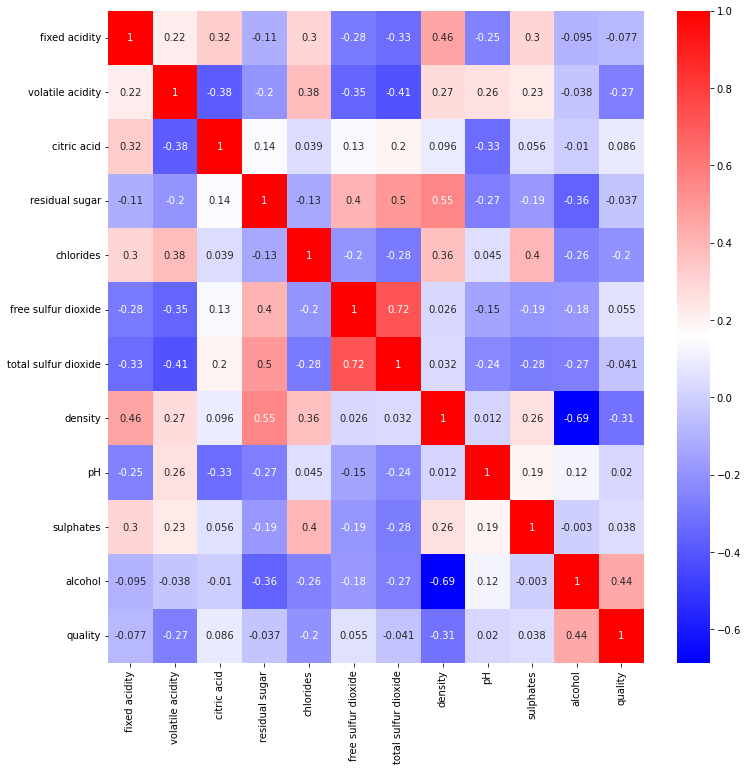

In [25]:
#Creating a pictorial visualisation of the above correlation matrix using a heatmap helps in better understanding. 
#We can do that using Seaborn's Heatmap function.

plt.figure(figsize=(12,12))
sns.heatmap(data=red_white.corr(),annot=True,cmap="bwr")
plt.show()

# (3) Exploring with Visuals

### Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? (fixed acidity, total sulfur dioxide, pH, alcohol.)

### Answer: fixed acidity and alcohol is skewed to the right¶

array([[<AxesSubplot:title={'center':'fixed acidity'}>]], dtype=object)

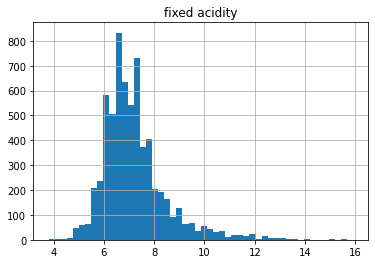

In [26]:
# bins = 10 by default, alpha = transparency
#red_white.hist();
red_white.hist('fixed acidity',bins=50)

array([[<AxesSubplot:title={'center':'total sulfur dioxide'}>]],
      dtype=object)

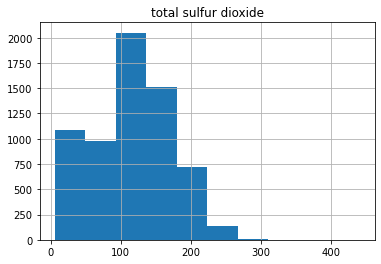

In [27]:
red_white.hist("total sulfur dioxide")

array([[<AxesSubplot:title={'center':'pH'}>]], dtype=object)

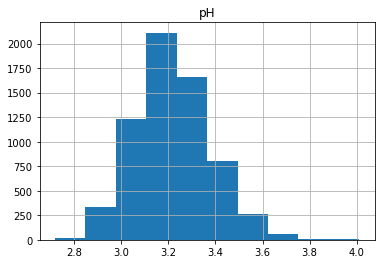

In [28]:
red_white.hist("pH")

array([[<AxesSubplot:title={'center':'alcohol'}>]], dtype=object)

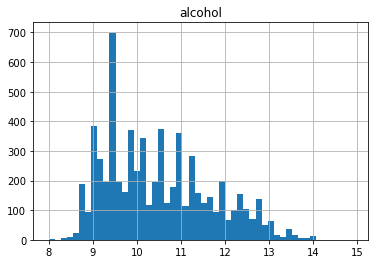

In [29]:
red_white.hist("alcohol", bins= 50)

## Based on scatterplots of quality against different feature variable which of the following is most likely to have a positive impact on quality? (volatile acidity, residual sugar, pH, alcohol).

## Answer: alcohol have a possitive impact on quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

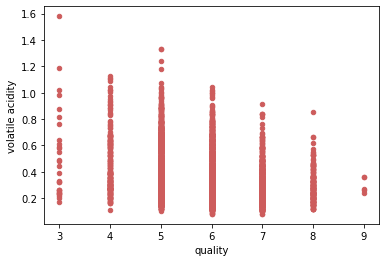

In [30]:
red_white.plot(x = "quality", y = "volatile acidity", kind = "scatter", color = "indianred")
#plt.show()

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

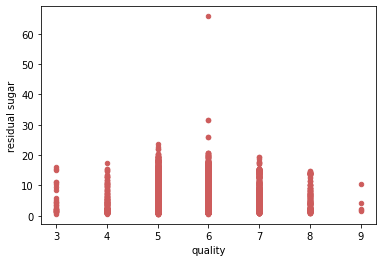

In [31]:
red_white.plot(x = "quality", y = "residual sugar", kind='scatter', color = "indianred")

<AxesSubplot:xlabel='quality', ylabel='pH'>

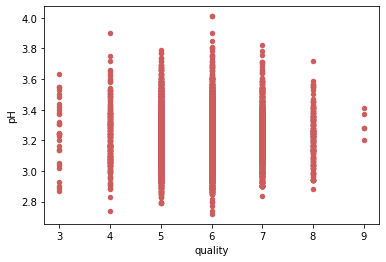

In [32]:
red_white.plot(x = "quality", y = "pH", kind='scatter', color = "indianred")

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

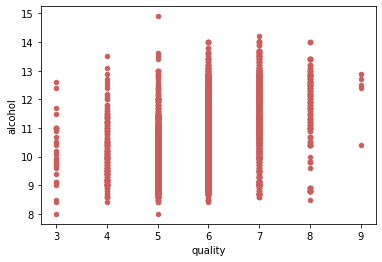

In [33]:
red_white.plot(x = "quality", y = "alcohol", kind='scatter', color = "indianred")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

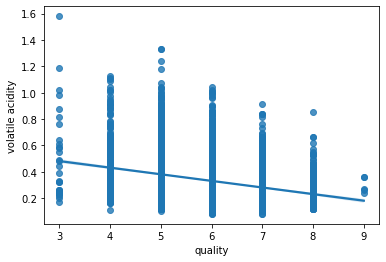

In [34]:
sns.regplot("quality", "volatile acidity", data = red_white)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

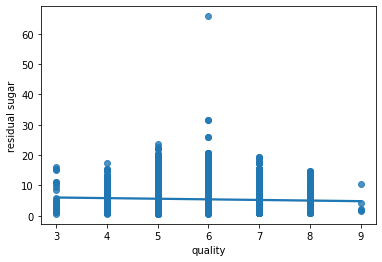

In [35]:
sns.regplot("quality", "residual sugar", data = red_white)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='pH'>

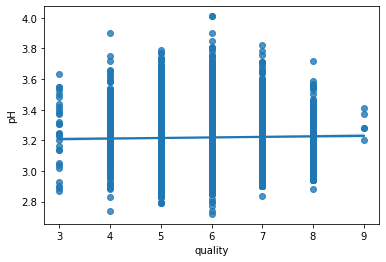

In [36]:
sns.regplot("quality", "pH", data = red_white)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

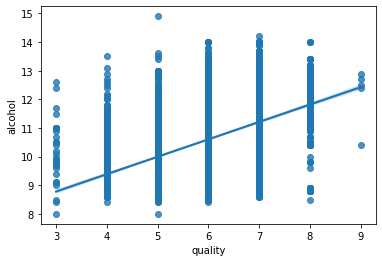

In [37]:
sns.regplot("quality", "alcohol", data = red_white)

# Bonus 

# (4) Drawing conclusion using Query

## Do wines with higher alcohol content recieve better ratings?

In [38]:
#To answer this question, use query to create two groups of wine samples.
#Low alcohol(samples with an alcohol content less than the median)
#High alcohol(samples with an alcohol content greater than or equal to the median)
#Then, find the mean quality rating of each group.

In [39]:
alcohol_mean = red_white["alcohol"].mean()
alcohol_mean

10.491800831152855

In [40]:
alcohol_median = red_white["alcohol"].median()
alcohol_median

10.3

In [41]:
alcohol_mode = red_white["alcohol"].mode()
alcohol_mode

0    9.5
Name: alcohol, dtype: float64

In [42]:
low_alcohol = red_white.query("alcohol < 10.3")
low_alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,white
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,white
6491,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white
6493,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white


In [43]:
low_alcohol["alcohol"].mean()       # low_alcohol mean

9.485463225264972

In [44]:
high_alcohol = red_white.query("alcohol >= 10.3")
high_alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,red
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6,red
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,6.1,0.340,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,white
6490,5.7,0.210,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,white
6492,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6495,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [45]:
high_alcohol["alcohol"].mean()

11.45479317269079

## Do sweeter wines(more residual sugar) receive better ratings?

### Similarly, use the median to split the samples into two groups by residual sugar and find the mean quality rating of each group.



In [46]:
residual_sugar_median = red_white["residual sugar"].median()
residual_sugar_median

3.0

In [47]:
red_white.columns = red_white.columns.str.replace(' ','_')

In [48]:
less_sweet = red_white.query('residual_sugar < 3.0')
less_sweet

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [49]:
#less_sweet["residual sugar"].mean() 

In [50]:
sweeter_wines = red_white.query("residual_sugar >= 3.0")
sweeter_wines

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.50,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.50,5,red
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.20,5,red
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.20,5,red
18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,4,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,5,white
6484,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6,white
6485,6.2,0.210,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7,white
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.40,6,white


In [51]:
sweeter_wines["residual_sugar"].mean() 

9.012492354740075

In [52]:
red_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

## Conclusion
From the above correlation matrix, we can observe that there is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.

we can observe there is a relatively high negative correlation between fixed_acidity and pH. There is relatively high positive correlation between alcohol presence and quality of the wines.

The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left. The attributes 'density' and 'pH' are quite normally distributed.

Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.